In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Configure the notebook to display the plot inline
%matplotlib inline

In [2]:
data_folder = "../data"
# os.listdir(data_folder)
file_path = os.path.join(data_folder, "Meditation.csv")
df_raw = pd.read_csv(file_path)

In [3]:
# Select some columns for additional analysis
df = df_raw[['Date', 'Forgetting', 'Concentration', 'Mindfulness', 'Investigation', 'Energy', 'Tranquility', 'Distracted']]
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

In [4]:
# Display the first 5 rows of the DataFrame
print(df.head())

                     Forgetting  Concentration  Mindfulness  Investigation   
Date                                                                         
2023-03-31 13:58:58           2              2            2            1.0  \
2023-03-31 07:53:28           3              1            0            0.0   
2023-04-01 14:56:07           2              1            2            1.0   
2023-04-01 20:07:51           2              3            3            1.0   
2023-04-02 08:03:22           1              2            1            0.0   

                     Energy  Tranquility  Distracted  
Date                                                  
2023-03-31 13:58:58       1            2         NaN  
2023-03-31 07:53:28       1            0         NaN  
2023-04-01 14:56:07       1            1         NaN  
2023-04-01 20:07:51       2            3         NaN  
2023-04-02 08:03:22       1            2         NaN  


In [55]:
def plot(df, frequency=None, sampling_method='mean'):
    # Create a dictionary to map frequency strings to pandas offset aliases
    freq_dict = {
        'hourly': 'H',
        'daily': 'D',
        'weekly': 'W',
        'monthly': 'M',
        'yearly': 'Y'
    }
    
    # Resample the data if frequency is not None
    if frequency is not None:
        # Convert frequency string to pandas offset alias
        resample_frequency = freq_dict[frequency]
        
        # Resample the data
        if sampling_method == 'mean':
            df = df.resample(resample_frequency).mean()
        elif sampling_method == 'min':
            df = df.resample(resample_frequency).min()
        elif sampling_method == 'max':
            df = df.resample(resample_frequency).max()
        else:
            raise ValueError("Invalid method. Choose from 'mean', 'min', 'max'.")

    # Create the plot
    ax = df.plot(style='x-', grid=True, figsize=(12, 8), markersize=8, linewidth=1)

    # Move the legend to outside of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Add a minor grid
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

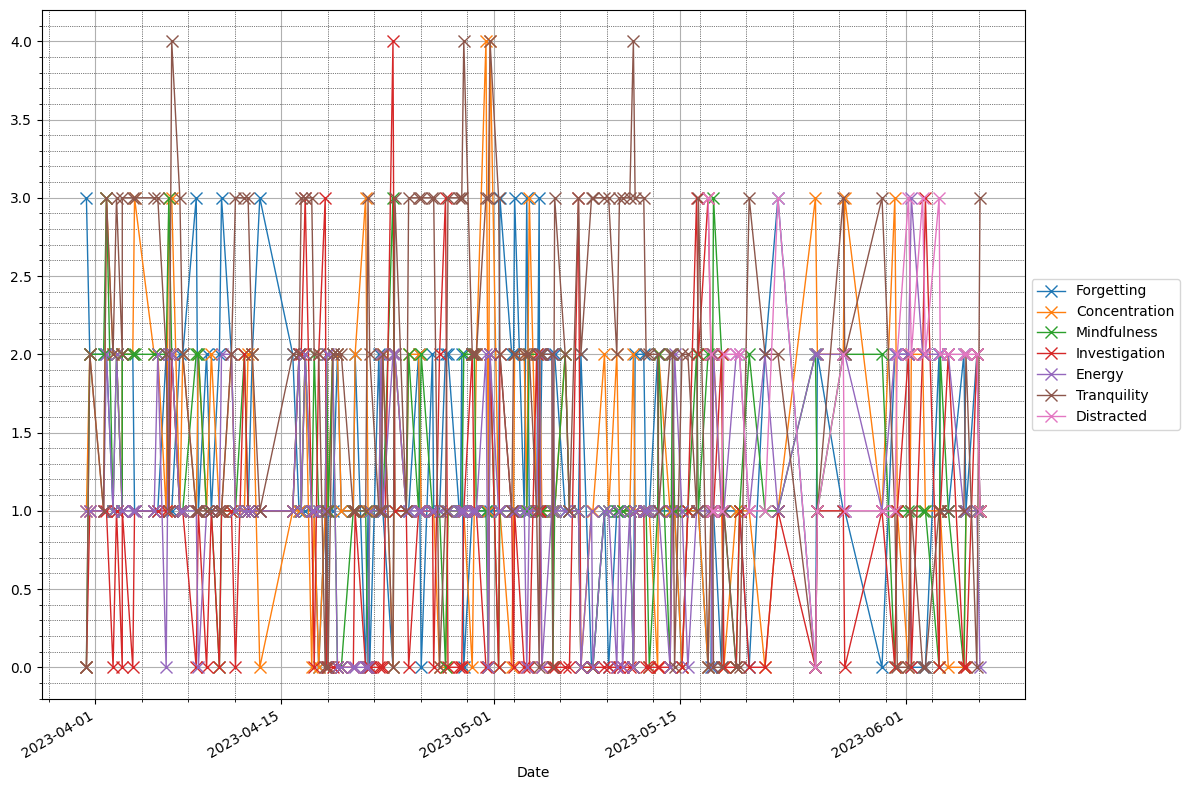

In [56]:
plot(df)

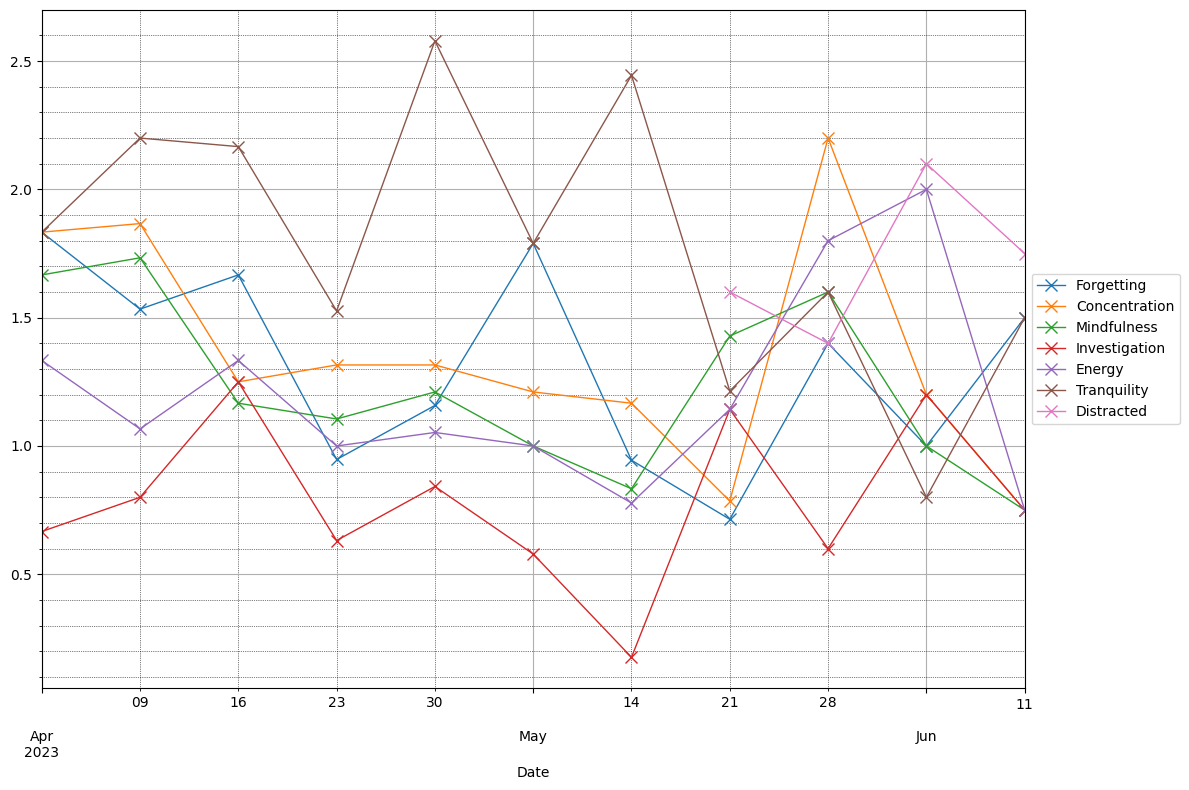

In [57]:
plot(df, frequency='weekly', sampling_method='mean')